In [12]:
import sys, os

import numpy as np

import pickle

import torch
from pytorch_msssim import MS_SSIM
from tqdm import tqdm

import model, generator, visuals

# CONFIGvisuals.visualize_dictionary(dictionary)
FOLDER_PATH = "/home/garysnake/Desktop/crsae/pytorch/results/default/2020_05_07_18_16_26/"
MODEL_PATH = FOLDER_PATH+"model_epoch3.pt"
HYP_PATH = FOLDER_PATH+"hyp.pickle"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

result_model = torch.load(MODEL_PATH)
dictionary = result_model.get_param("H").data
dictionary = dictionary.view((dictionary.size()[0],dictionary.size()[2],dictionary.size()[3]))
print(dictionary.size())


file = open(HYP_PATH, "rb")
hyper_parameter = pickle.load(file)
file.close()

for name, val in hyper_parameter.items():
    print(str(name) + ": " + str(val))



    


torch.Size([12, 15, 15])
experiment_name: default
dataset: VOC
network: CRsAE2DUntiedTrainableBias
dictionary_dim: 15
num_conv: 12
stride: 6
L: 5
trainable_bias: True
delta: 50
num_iters: 10
batch_size: 10
num_epochs: 6
normalize: True
lr: 0.0005
lr_decay: 0.7
lr_step: 20
lr_lam: 0.0001
cyclic: True
base_lr: 5e-05
max_lr: 0.0005
noiseSTD: 20
shuffle: True
test_path: ../data/test_img/
train_path: ../data/test_img/
device: cuda:0
warm_start: True
info_period: 10
denoising: True
supervised: True
crop_dim: [250, 250]
init_with_DCT: False
init_with_saved_file: False
sigma: 0.18
loss: L1
lam: 0.1
twosided: True
image_set: train
year: 2012
segmentation: True


In [14]:

for i in range(5):
    file = open(FOLDER_PATH+"loss_epoch1.pt", "rb")
    loss = pickle.load(file)
    file.close()
    print(loss)




FileNotFoundError: [Errno 2] No such file or directory: '/home/garysnake/Desktop/crsae/pytorch/results/default/2020_05_07_18_16_26/loss_epoch1.pt'

In [15]:

"""
Data_loader is iterable
[ (image1_tensor, label1_tensor), ...]
"""
# If you want path support different dataset, use below
# data_loader = generator.get_path_loader(1, DATA_PATH, shuffle=False)
data_loader = generator.get_MNIST_loader(1, trainable=False, shuffle=False)
print(len(data_loader))

# Split for visualization
data_nparray = np.array([one_data[0].view(-1).numpy() for one_data in data_loader])
labels_nparray = np.array([one_data[1] for one_data in data_loader])

# Visualize original space
# visuals.visualize_latent_space(model="PCA", data=data_nparray, label=labels_nparray)



10000


In [17]:
 
noisy_img_list = []
embedding_model_np = []
img_model_np = []
num_data = 10
noiseSTD = 20

with torch.no_grad():
    for i, (img_test, _) in enumerate(tqdm(data_loader)):
        noisy_img = (img_test + noiseSTD / 255 * torch.randn(img_test.shape)).to(DEVICE)
        img_new, x_new, _ = result_model(noisy_img)
        print(x_new.size())
        noisy_img_list.append(noisy_img.view(-1).to("cpu").detach().numpy())
        embedding_model_np.append(x_new.view(-1).to("cpu").detach().numpy())
        img_model_np.append(img_new.view(-1).to("cpu").detach().numpy())
        if i == num_data-1:
            break

embedding_model_np = np.array(embedding_model_np)
    

0%|          | 9/10000 [00:00<01:28, 112.60it/s]torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])
torch.Size([36, 12, 6, 6])



In [15]:
print(img_model_np[0].size)
print(type(img_model_np[0]))
print(type(embedding_model_np[0]))
print(embedding_model_np[0].size)

784
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
11664


/home/garysnake/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


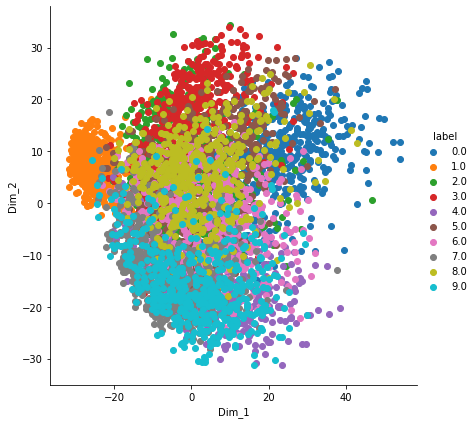

In [117]:
# Visualize the Latent_space 
# visuals.visualize_img(img_model_np[:20], labels_nparray[:20], (28,28))
# visuals.visualize_latent_space("TSNE", noisy_img_list[:num_data], labels_nparray[:num_data])
# visuals.visualize_latent_space("TSNE", img_model_np, labels_nparray[:num_data])
visuals.visualize_latent_space("PCA", embedding_model_np, labels_nparray[:num_data])



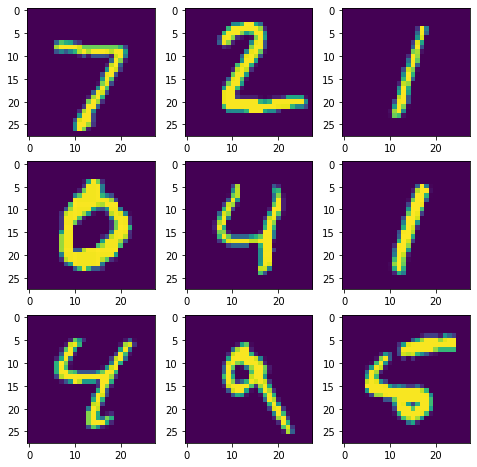

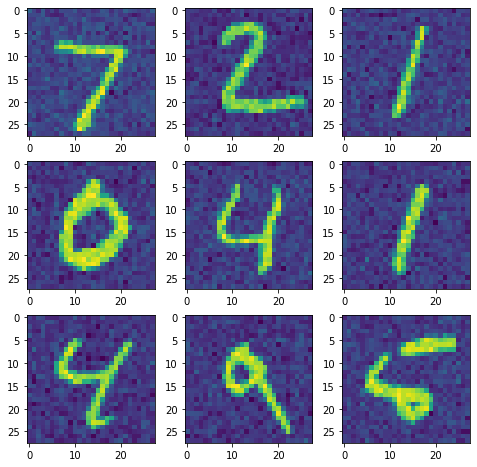

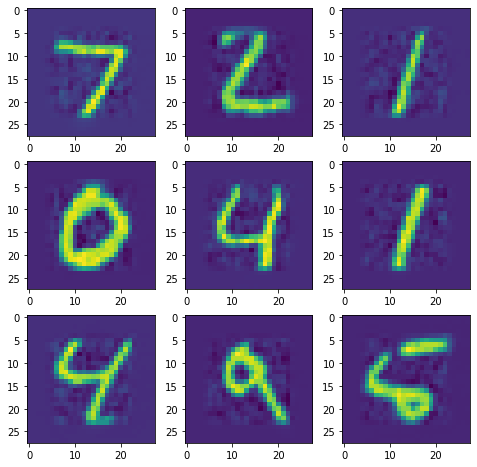

In [115]:
# Visualize the image itself to see the noisy input
visuals.visualize_img(data_nparray[:9], labels_nparray[:9], (28,28))
visuals.visualize_img(noisy_img_list[:9], labels_nparray[:9], (28,28))
visuals.visualize_img(img_model_np[:9], labels_nparray[:9], (28,28))


In [37]:
visuals.visualize_img(dictionary, labels_nparray[:10], (28,28))

torch.Size([36, 30, 30])


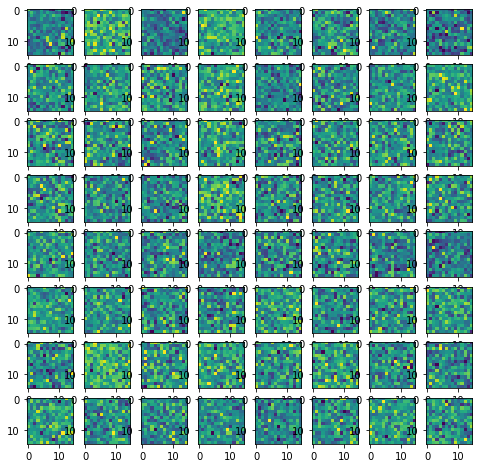

In [12]:
visuals.visualize_dictionary(dictionary.cpu())


In [9]:
# PSNR = np.load(FOLDER_PATH + "psnr_epoch0.npy")
# print(np.mean(PSNR))
# PSNR = np.load(FOLDER_PATH + "psnr_epoch1.npy")

PSNR = np.load(FOLDER_PATH + "psnr_init.npy")
print(np.mean(PSNR))
for i in range(1):
    PSNR = np.load(FOLDER_PATH + "psnr_epoch{}.npy".format(i))
    print(np.mean(PSNR))  

10.160510589713232
20.47066314993426
21.046507907276972
21.217256957972424
21.36509639970027
21.27111476434395
21.38995085209608


FileNotFoundError: [Errno 2] No such file or directory: '/home/garysnake/Desktop/crsae/pytorch/results/default/2020_05_07_16_47_09/psnr_epoch6.npy'